In [7]:
import os
import re

# Define the root directory containing your folders
root_dir = '/home/ardo0115/workspace/Subspace-Tuning/CR_MR/finetune'

# Dictionary to store the results
accuracy_results = {}
Baseline = []
# Baseline = ['math_dora_r=8', 'math_lora_r=8', 'math_lora-dash_r=8']
# Baseline = ['math_dora_r=16', 'math_lora_r=16', 'math_lora-dash_r=16', 'math_lora_r=16_epoch2', 'math_lora_r=16_epoch1']

# Baseline = ['dora_r=8', 'lora-dash_r=8', 'lora_r=8']
# Baseline += ['dora_r=16', 'lora-dash_r=16', 'lora_r=16', 'lora_r=16_epoch2', 'lora_r=16_epoch1']
rank = 16
# Baseline += [f'lora_r={rank}']
# Baseline += [f'dora_r={rank}_lr1e-4']
# Baseline += ['lora_r=16_lr3e-4', 'lora_r=16_lr3e-4_epoch2', 'lora_r=16_lr3e-4_epoch1']
# Baseline += [f'lora-dash_r={rank}_lr2e-4']
# Baseline += [f'lora-MoSLoRA_r={rank}_lr3e-4']
# Baseline += ['lora-MoSLoRA_r=8_lr3e-4']
# Baseline += [f'lora_r={rank}_lr3e-4_epoch2']
# Baseline += ['lora_r=8_TrainBMixerUniformDiagOffDiag_lr1e-4_fromepoch2_withMathlr3e-4']
# Baseline += ['lora_r=8_TrainBMixerUniformDiagOffDiag_lr1e-4_fromepoch2_withMathlr3e-4Epoch3Val120']

# Baseline += ['lora_r=8_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_lr3e-4_epoch3_val120', 'lora_r=16_lr3e-4_epoch2_val120']
# Baseline += ['lora_r=32_lr3e-4_epoch3_val120', 'lora_r=32_lr3e-4_epoch2_val120']
# Baseline += ['dora_r=16_lr1e-4_epoch3_val120', 'dora_r=32_lr1e-4_epoch3_val120']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withlr3e-4']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr3e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr3e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr3e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr2e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr2e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr2e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr5e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr5e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr5e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr4e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr4e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr4e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_lr3e-4_epoch3_joint']

# Baseline += ['adapterH_lr3e-4', 'adapterP_lr3e-4', 'ParallelAdapter_lr3e-4']
# Baseline += ['lora_r=16_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withMathlr3e-4Epoch3Val120']

# for i in range(len(Baseline)):
#     Baseline[i] = 'math_' + Baseline[i]

Baseline += ['gemma9_lora_r=16_lr15e-5_batch8']
Baseline += ['gemma2_dora_r=16_lr5e-5_batch8']
# Baseline += ['gemma9_domix_lora_r=16_lr5e-5_batch8_seed42']
Baseline += ['gemma9_domix_lora_r=16_lr5e-5_batch8_seed0']




skip_tasks = ['MultiArith', 'SingleEq', 'AddSub']
# Function to extract the last occurrence of accuracy from a file
def extract_last_accuracy(file_path):
    last_accuracy = None
    with open(file_path, 'r') as file:
        for line in file:
            # Adjust regex to match the accuracy format like '0.7528296115019883'
            match = re.search(r'accuracy\s+\d+\s+([\d.]+)', line)
            if match:
                last_accuracy = float(match.group(1))
    return last_accuracy

# Iterate through each folder and filde
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if folder not in Baseline and ('math' in folder or '16' not in folder or 'TrainBMixerUniformDiag' not in folder or 'with' not in folder or 'fromepoch2' not in folder or 'lr1e-4' not in folder or 'Self' in folder or 'Val' in folder):
        continue
    # if 'adapter' not in folder and 'Adapter' not in folder:
    #     continue

    if os.path.isdir(folder_path):
        accuracy_results[folder] = {}
        for file in os.listdir(folder_path):
            if any(task in file for task in skip_tasks):
                continue
            if file.endswith('.txt'):
                file_path = os.path.join(folder_path, file)
                accuracy = extract_last_accuracy(file_path)
                if accuracy is not None:
                    accuracy_results[folder][file] = accuracy

# Display results
for folder, files in accuracy_results.items():
    print(f'Folder: {folder}')
    for file, accuracy in files.items():
        print(f'  File: {file} | Accuracy: {accuracy:.4f}')

Folder: gemma2_dora_r=16_lr5e-5_batch8
  File: winogrande.txt | Accuracy: 0.8824
  File: openbookqa.txt | Accuracy: 0.9120
  File: social_i_qa.txt | Accuracy: 0.8214
  File: ARC-Easy.txt | Accuracy: 0.9520
  File: boolq.txt | Accuracy: 0.7813
  File: ARC-Challenge.txt | Accuracy: 0.8771
  File: piqa.txt | Accuracy: 0.9048
  File: hellaswag.txt | Accuracy: 0.9662
Folder: gemma9_domix_lora_r=16_lr5e-5_batch8_seed0
  File: winogrande.txt | Accuracy: 0.9037
  File: openbookqa.txt | Accuracy: 0.9280
  File: social_i_qa.txt | Accuracy: 0.8240
  File: ARC-Easy.txt | Accuracy: 0.9600
  File: boolq.txt | Accuracy: 0.7761
  File: ARC-Challenge.txt | Accuracy: 0.8874
  File: piqa.txt | Accuracy: 0.9151
  File: hellaswag.txt | Accuracy: 0.9693
Folder: lora_r=16_TrainBMixerUniformDiagTrainAsCat_lr1e-4_fromepoch2_withMathlr3e-4
  File: winogrande.txt | Accuracy: 0.8571
  File: openbookqa.txt | Accuracy: 0.8680
  File: social_i_qa.txt | Accuracy: 0.8030
  File: ARC-Easy.txt | Accuracy: 0.9053
  File:

{'gemma2_dora_r=16_lr5e-5_batch8': {'winogrande.txt': 0.8823993685872139, 'openbookqa.txt': 0.912, 'social_i_qa.txt': 0.8213920163766633, 'ARC-Easy.txt': 0.952020202020202, 'boolq.txt': 0.7813455657492355, 'ARC-Challenge.txt': 0.8771331058020477, 'piqa.txt': 0.9047878128400435, 'hellaswag.txt': 0.9662417845050787}, 'gemma9_domix_lora_r=16_lr5e-5_batch8_seed0': {'winogrande.txt': 0.9037095501183899, 'openbookqa.txt': 0.928, 'social_i_qa.txt': 0.8239508700102354, 'ARC-Easy.txt': 0.960016835016835, 'boolq.txt': 0.7761467889908257, 'ARC-Challenge.txt': 0.8873720136518771, 'piqa.txt': 0.9151251360174102, 'hellaswag.txt': 0.9693288189603665}, 'lora_r=16_TrainBMixerUniformDiagTrainAsCat_lr1e-4_fromepoch2_withMathlr3e-4': {'winogrande.txt': 0.8571428571428571, 'openbookqa.txt': 0.868, 'social_i_qa.txt': 0.8029682702149437, 'ARC-Easy.txt': 0.9053030303030303, 'boolq.txt': 0.7428134556574923, 'ARC-Challenge.txt': 0.8020477815699659, 'piqa.txt': 0.8868335146898803, 'hellaswag.txt': 0.962557259510

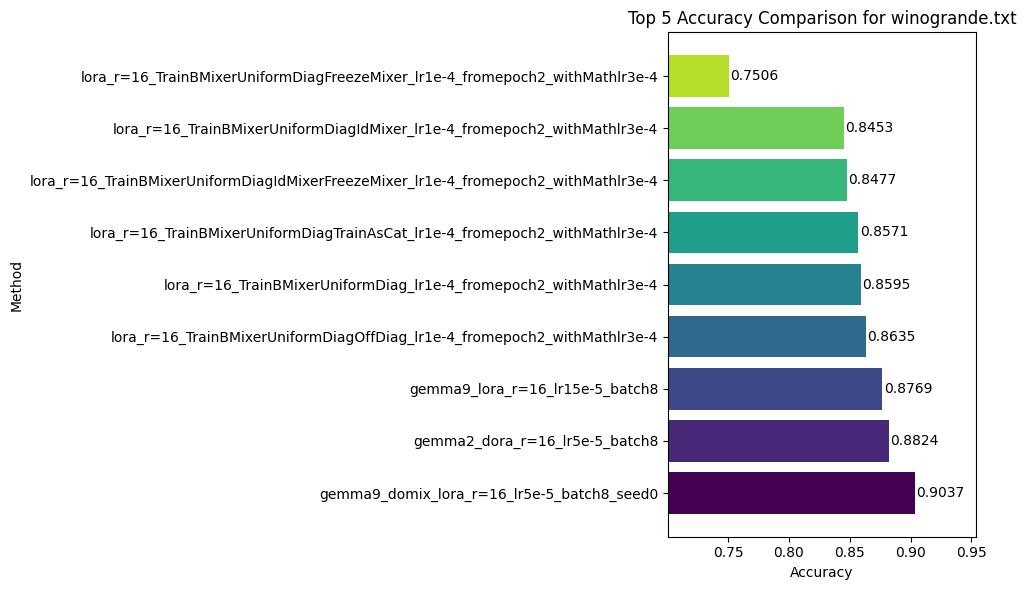

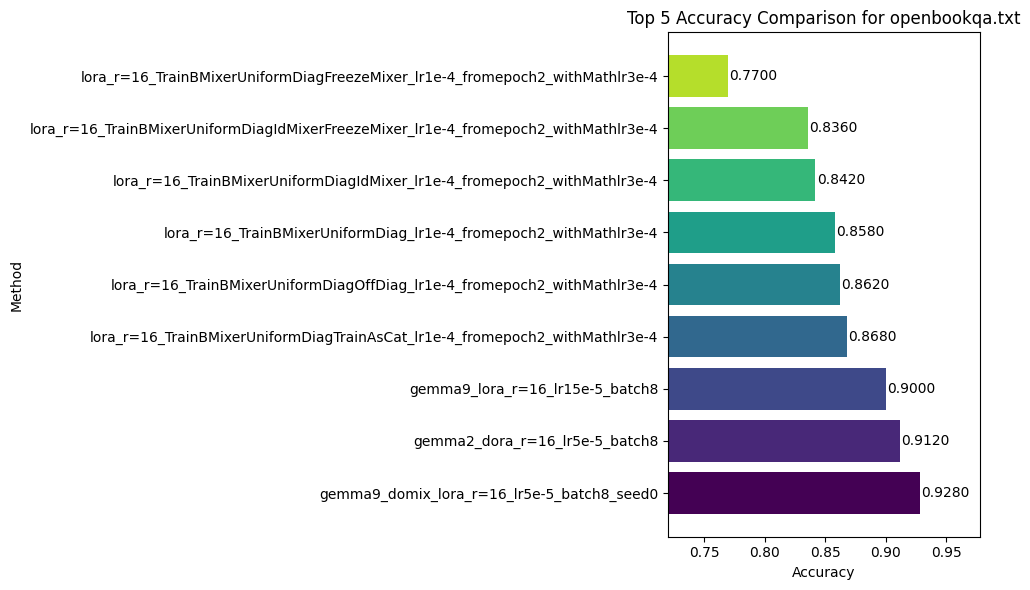

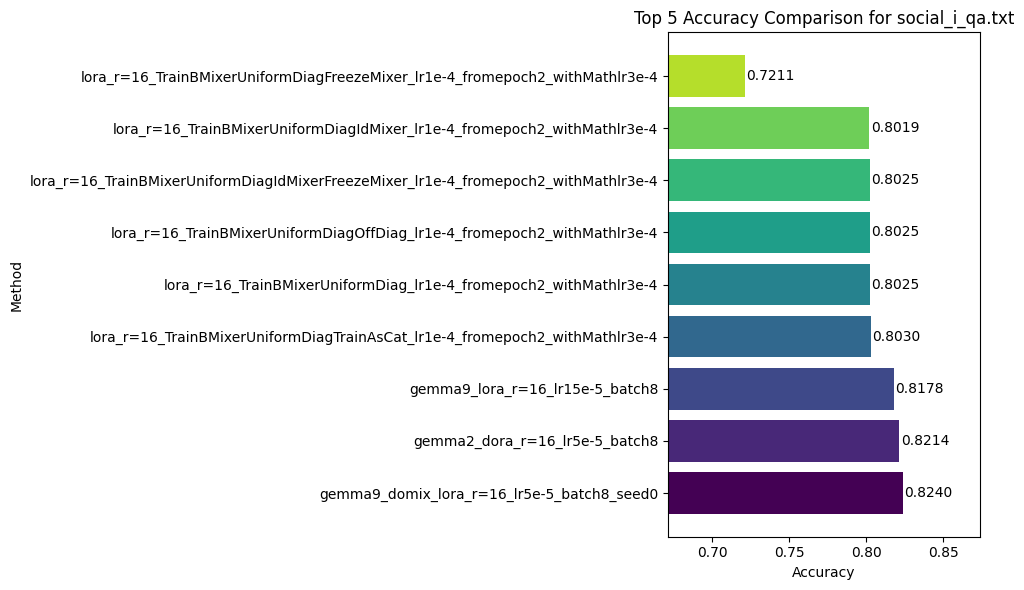

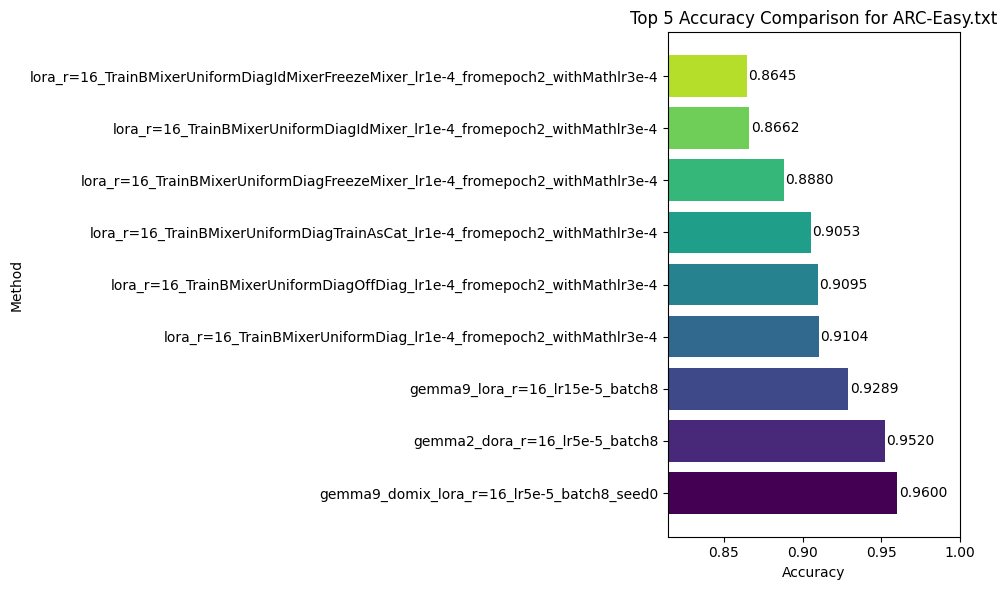

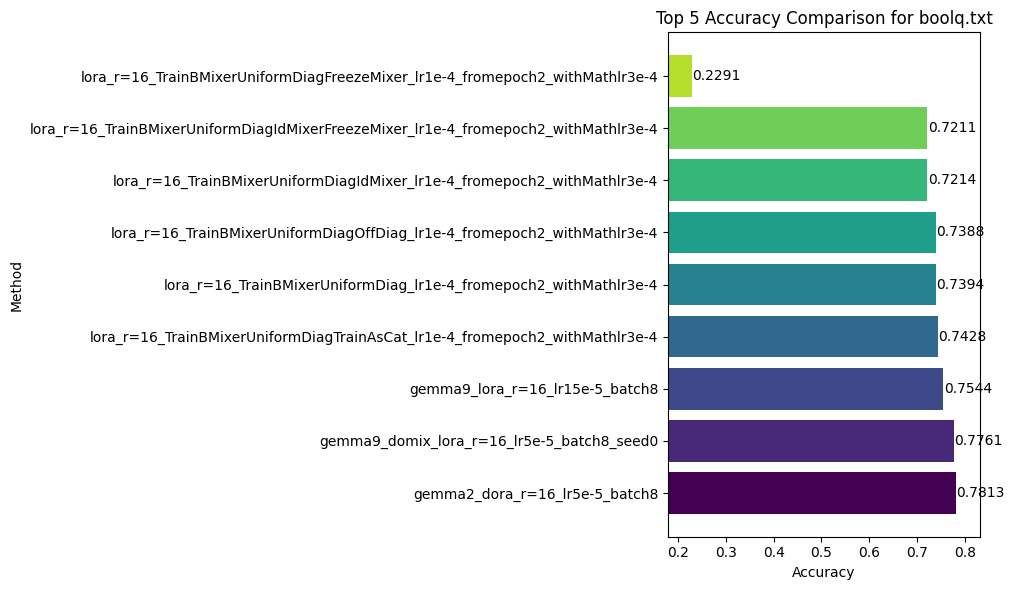

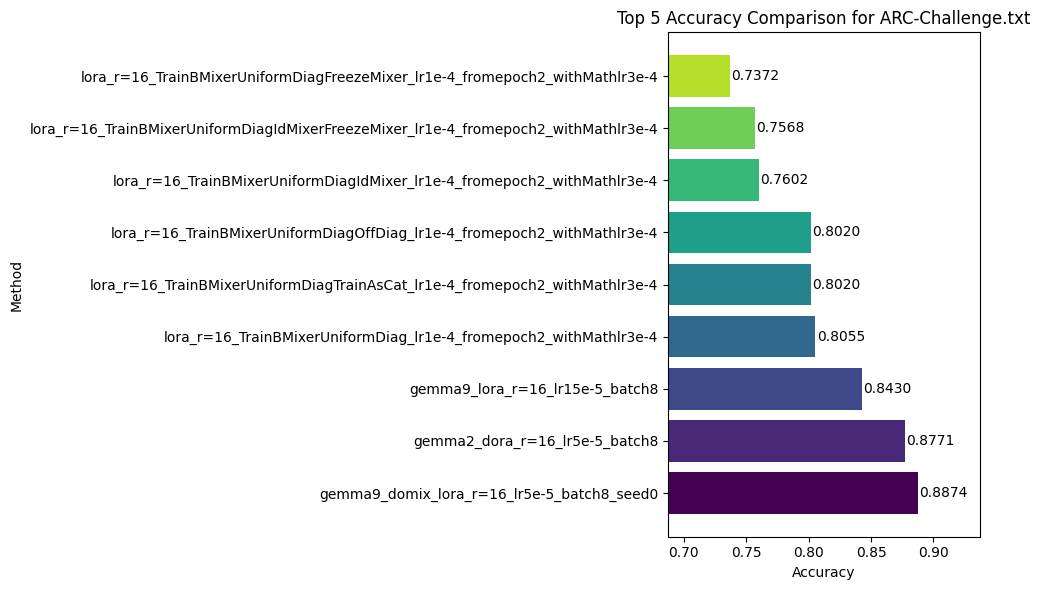

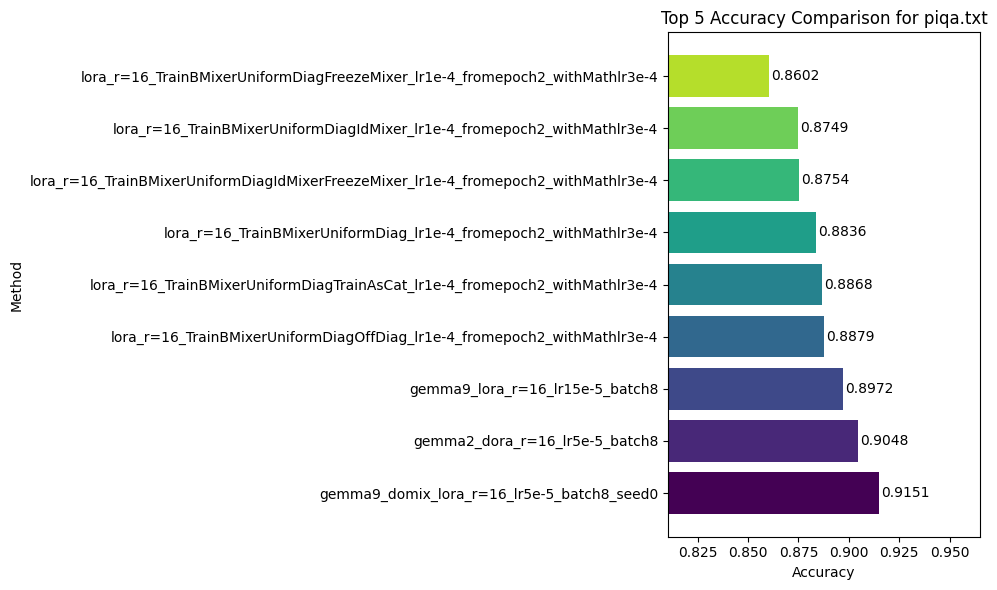

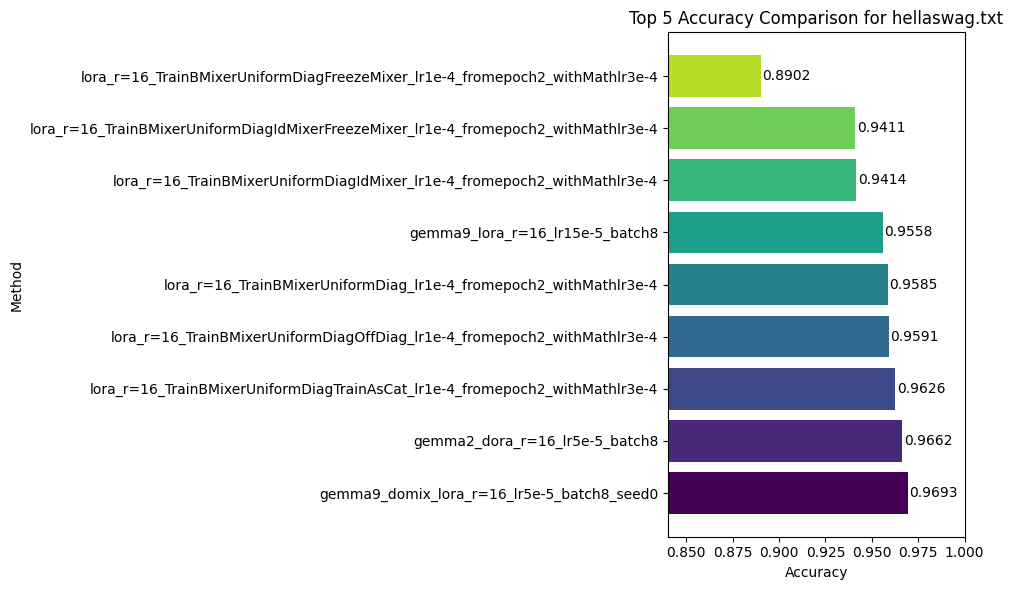

In [8]:
import matplotlib.pyplot as plt

print(accuracy_results)
# Extract the tasks from one of the methods to ensure all tasks are covered
tasks = list(accuracy_results[next(iter(accuracy_results))].keys())

# Generate a plot for each task
for task in tasks:
    # Filter methods that have a valid accuracy for the current task and sort by accuracy
    task_accuracies = [(method, accuracy_results[method][task]) for method in accuracy_results if task in accuracy_results[method]]
    top_5_methods = sorted(task_accuracies, key=lambda x: x[1], reverse=True)[:10]
    
    # Unpack the top 5 methods and accuracies
    if top_5_methods:
        filtered_methods, accuracies = zip(*top_5_methods)
    else:
        filtered_methods, accuracies = [], []

    # Calculate a suitable y-axis range for better contrast
    min_acc = min(accuracies) if accuracies else 0
    max_acc = max(accuracies) if accuracies else 1
    y_range = max(0, min_acc - 0.05), min(1, max_acc + 0.05)
    
    # Create a horizontal bar plot for better readability
    plt.figure(figsize=(10, 6))
    bars = plt.barh(filtered_methods, accuracies, color=plt.cm.viridis([i/len(filtered_methods) for i in range(len(filtered_methods))]))
    
    # Add data labels to each bar
    for bar in bars:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():.4f}', va='center', ha='left')
    
    # Add titles and labels
    plt.title(f'Top 5 Accuracy Comparison for {task}')
    plt.xlabel('Accuracy')
    plt.ylabel('Method')
    plt.xlim(y_range)  # Set the y-axis range for better contrast
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [9]:
import os
import re
# Define the root directory containing your folders
root_dir = '/home/ardo0115/workspace/Subspace-Tuning/CR_MR/finetune'
Baseline = []
# Baseline = ['math_dora_r=8', 'math_lora_r=8', 'math_lora-dash_r=8']
# Baseline = ['math_dora_r=16', 'math_lora_r=16', 'math_lora-dash_r=16', 'math_lora_r=16_epoch2', 'math_lora_r=16_epoch1']

# Baseline = ['dora_r=8', 'lora-dash_r=8_lr2e-4', 'lora_r=8_lr3e-4_epoch2']
# Baseline = ['dora_r=16', 'lora-dash_r=16', 'lora_r=16', 'lora_r=16_lr3e-4_epoch2', 'lora_r=16_lr3e-4_epoch1']

rank = 16
# Baseline += [f'lora_r={rank}']
# Baseline += [f'dora_r={rank}_lr1e-4']
# Baseline += ['lora_r=16_lr3e-4', 'lora_r=16_lr3e-4_epoch2', 'lora_r=16_lr3e-4_epoch1']
# Baseline += [f'lora-dash_r={rank}_lr2e-4']
# Baseline += [f'lora-MoSLoRA_r={rank}_lr3e-4']
# Baseline += ['lora-MoSLoRA_r=8_lr3e-4']
# Baseline += [f'lora_r={rank}_lr3e-4_epoch2']
# Baseline += ['lora_r=8_TrainBMixerUniformDiagOffDiag_lr1e-4_fromepoch2_withMathlr3e-4']
# Baseline += ['lora_r=8_TrainBMixerUniformDiagOffDiag_lr1e-4_fromepoch2_withMathlr3e-4Epoch3Val120']

# Baseline += ['lora_r=8_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_lr3e-4_epoch3_val120', 'lora_r=16_lr3e-4_epoch2_val120']
# Baseline += ['lora_r=32_lr3e-4_epoch3_val120', 'lora_r=32_lr3e-4_epoch2_val120']
# Baseline += ['dora_r=16_lr1e-4_epoch3_val120', 'dora_r=32_lr1e-4_epoch3_val120']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withlr3e-4']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr3e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr3e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr3e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr2e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr2e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr2e-4_fromepoch2_withSelf']
# Baseline += ['lora_r=16_val120_TrainBMixerUniformDiag_lr5e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr5e-4_fromepoch2_withlr3e-4', 'lora_r=32_val120_TrainBMixerUniformDiag_lr5e-4_fromepoch2_withSelf']

# for i in range(len(Baseline)):
#     if '32' in Baseline[i]:
#         Baseline[i] = Baseline[i].replace('32', '16')
# for i in range(len(Baseline)):
#     Baseline[i] = 'math_' + Baseline[i]
# Baseline += ['lora_r=32_lr3e-4_epoch3_joint']
Baseline += ['gemma9_lora_r=16_lr15e-5_batch8']
Baseline += ['gemma2_dora_r=16_lr5e-5_batch8']
# Baseline += ['gemma9_domix_lora_r=16_lr5e-5_batch8_seed42']
Baseline += ['gemma9_domix_lora_r=16_lr5e-5_batch8_seed0']

# Dictionary to store the results
accuracy_results = {}

skip_tasks = ['MultiArith', 'SingleEq', 'AddSub']
# Function to extract the last occurrence of accuracy from a file
def extract_last_accuracy(file_path):
    last_accuracy = None
    with open(file_path, 'r') as file:
        for line in file:
            # Adjust regex to match the accuracy format like '0.7528296115019883'
            match = re.search(r'accuracy\s+\d+\s+([\d.]+)', line)
            if match:
                last_accuracy = float(match.group(1))
    return last_accuracy

# Iterate through each folder and file
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if folder not in Baseline and ('math' in folder or '16' not in folder or 'TrainBMixerUniformDiag' not in folder or 'with' not in folder or 'fromepoch2' not in folder or 'lr1e-4' not in folder or 'Self' in folder or 'Val' in folder):
    # if folder not in Baseline:
        continue
    if os.path.isdir(folder_path):
        accuracies = []
        for file in os.listdir(folder_path):
            if any(task in file for task in skip_tasks):
                continue
            if file.endswith('.txt'):
                file_path = os.path.join(folder_path, file)
                accuracy = extract_last_accuracy(file_path)
                if accuracy is not None:
                    accuracies.append(accuracy)
        
        # Store the mean accuracy for the folder
        if accuracies:
            accuracy_results[folder] = sum(accuracies) / len(accuracies)

# Display the mean accuracy for each folder
for folder, mean_accuracy in accuracy_results.items():
    print(f'Folder: {folder} | Mean Accuracy: {mean_accuracy:.4f}')

Folder: gemma2_dora_r=16_lr5e-5_batch8 | Mean Accuracy: 0.8872
Folder: gemma9_domix_lora_r=16_lr5e-5_batch8_seed0 | Mean Accuracy: 0.8955
Folder: lora_r=16_TrainBMixerUniformDiagTrainAsCat_lr1e-4_fromepoch2_withMathlr3e-4 | Mean Accuracy: 0.8535
Folder: lora_r=16_TrainBMixerUniformDiagIdMixer_lr1e-4_fromepoch2_withMathlr3e-4 | Mean Accuracy: 0.8317
Folder: lora_r=16_TrainBMixerUniformDiagFreezeMixer_lr1e-4_fromepoch2_withMathlr3e-4 | Mean Accuracy: 0.7308
Folder: lora_r=16_TrainBMixerUniformDiag_lr1e-4_fromepoch2_withMathlr3e-4 | Mean Accuracy: 0.8522
Folder: gemma9_lora_r=16_lr15e-5_batch8 | Mean Accuracy: 0.8717
Folder: lora_r=16_TrainBMixerUniformDiagOffDiag_lr1e-4_fromepoch2_withMathlr3e-4 | Mean Accuracy: 0.8532
Folder: lora_r=16_TrainBMixerUniformDiagIdMixerFreezeMixer_lr1e-4_fromepoch2_withMathlr3e-4 | Mean Accuracy: 0.8306


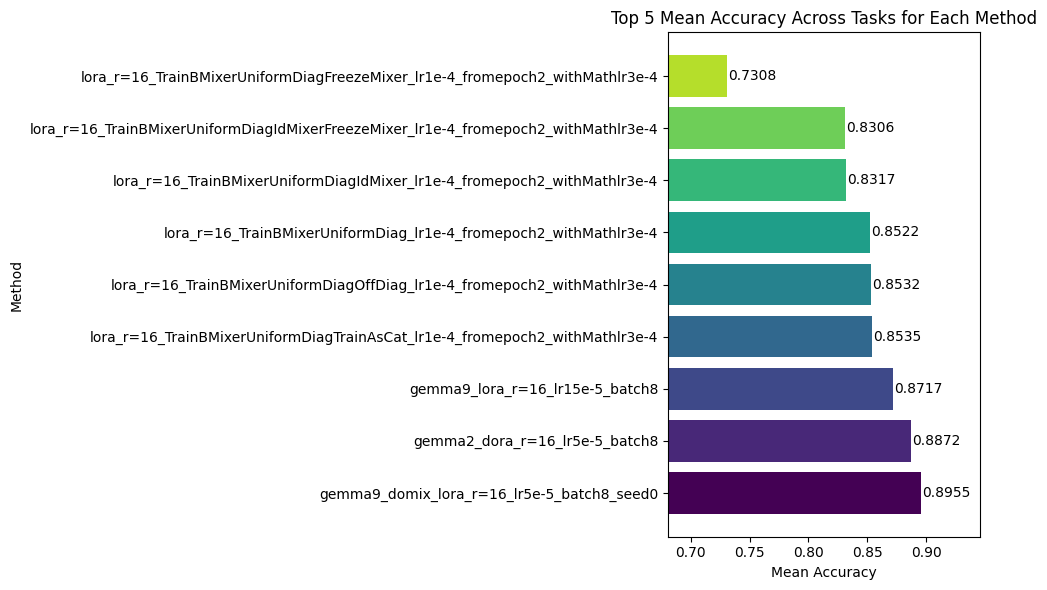

In [10]:
import matplotlib.pyplot as plt


# Sort methods by mean accuracy and select the top 5
top_5_methods = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)[:20]
methods, mean_accuracies = zip(*top_5_methods) if top_5_methods else ([], [])

# Calculate a suitable y-axis range for better contrast
min_acc = min(mean_accuracies) if mean_accuracies else 0
max_acc = max(mean_accuracies) if mean_accuracies else 1
y_range = max(0, min_acc - 0.05), min(1, max_acc + 0.05)

# Create a horizontal bar plot for top 5 mean accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(methods, mean_accuracies, color=plt.cm.viridis([i / len(methods) for i in range(len(methods))]))

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='left')

# Add titles and labels
plt.title('Top 5 Mean Accuracy Across Tasks for Each Method')
plt.xlabel('Mean Accuracy')
plt.ylabel('Method')
plt.xlim(y_range)  # Set the x-axis range for better contrast

# Display the plot
plt.tight_layout()
plt.show()

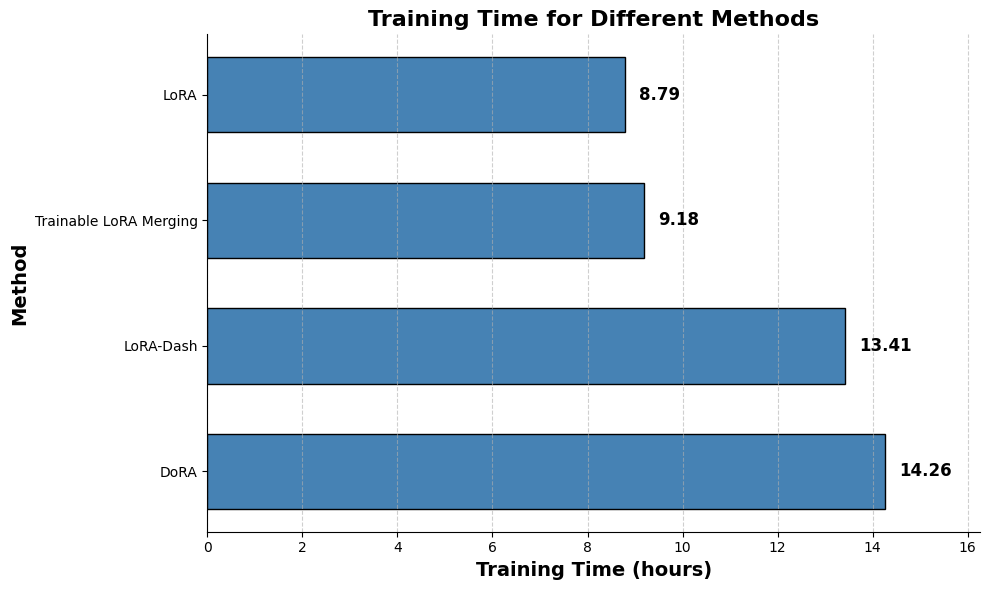

In [162]:
import matplotlib.pyplot as plt

# Data for plotting
accuracy_results = {'DoRA': 14.26, 'LoRA': 8.79, 'LoRA-Dash': 13.41, 'Trainable LoRA Merging': 9.18}
methods, mean_accuracies = zip(*sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True))

# Set up the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(methods, mean_accuracies, color='steelblue', edgecolor='black', height=0.6)

# Add data labels with larger font and bold style
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=12, fontweight='bold', color='black')

# Titles and labels with bold font
plt.title('Training Time for Different Methods', fontsize=16, fontweight='bold')
plt.xlabel('Training Time (hours)', fontsize=14, fontweight='bold')
plt.ylabel('Method', fontsize=14, fontweight='bold')

# Customize x-axis range and gridlines
plt.xlim(0, max(mean_accuracies) + 2)  # Extend range for better spacing
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout for tightness
plt.tight_layout()
plt.show()

/tmp/ipykernel_15411/752114731.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')


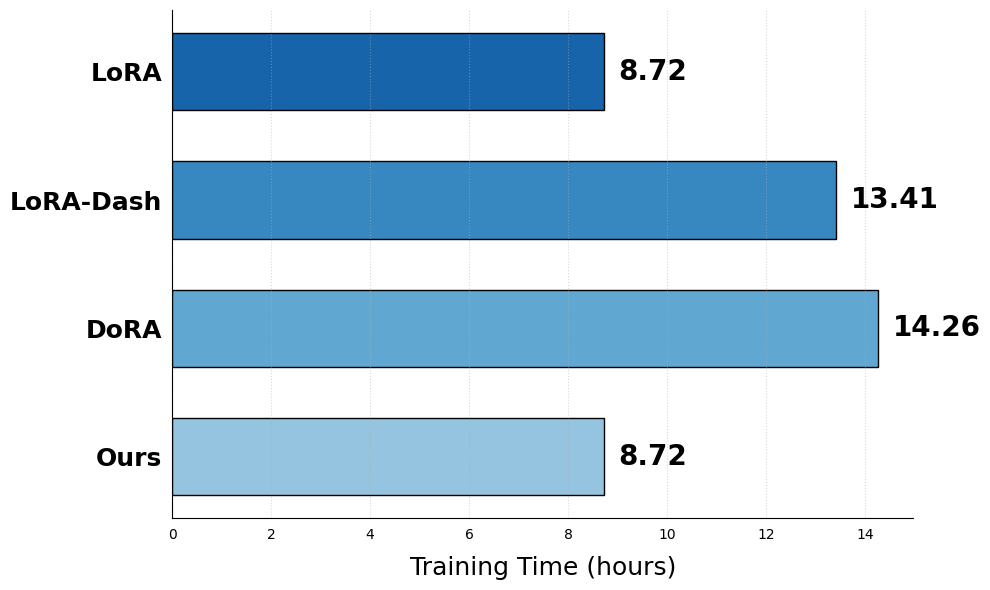

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
accuracy_results = {'LoRA': 8.72, 'LoRA-Dash': 13.41, 'DoRA': 14.26,  'Ours': 8.72}
methods, mean_accuracies = zip(*(accuracy_results.items()).__reversed__())

# Set up the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(methods)))

bars = plt.barh(methods, mean_accuracies, color=colors, edgecolor='black', height=0.6)

# Add data labels with larger font and bold style
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=20, fontweight='bold', color='black')

# Titles and labels with sans-serif font
# plt.title('Training Time for Different Methods', fontsize=18, fontweight='bold')
plt.xlabel('Training Time (hours)', fontsize=18, fontweight='regular', labelpad=10)
# plt.ylabel('Method', fontsize=14, fontweight='regular', labelpad=10)

# Style method names for emphasis
plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')

# Remove ticks and adjust spines
plt.tick_params(left=False, bottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Subtle gridlines
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

/tmp/ipykernel_15411/1757286198.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')


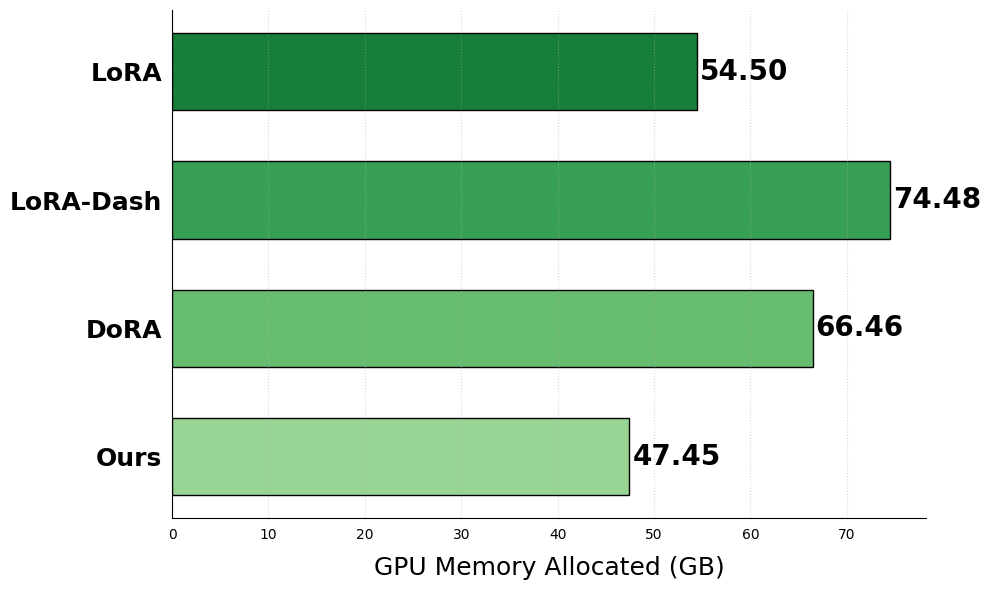

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
accuracy_results = {'LoRA': 54.50, 'LoRA-Dash': 74.48, 'DoRA': 66.46, 'Ours':47.45}
methods, mean_accuracies = zip(*(accuracy_results.items()).__reversed__())

# Set up the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(methods)))

bars = plt.barh(methods, mean_accuracies, color=colors, edgecolor='black', height=0.6)

# Add data labels with larger font and bold style
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=20, fontweight='bold', color='black')

# Titles and labels with sans-serif font
# plt.title('Peak GPU Memory Allocated for Difference Methods', fontsize=18, fontweight='bold')
plt.xlabel('GPU Memory Allocated (GB)', fontsize=18, fontweight='regular', labelpad=10)
# plt.ylabel('Method', fontsize=14, fontweight='regular', labelpad=10)

# Style method names for emphasis
plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')

# Remove ticks and adjust spines
plt.tick_params(left=False, bottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Subtle gridlines
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

/tmp/ipykernel_15411/1728183143.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')


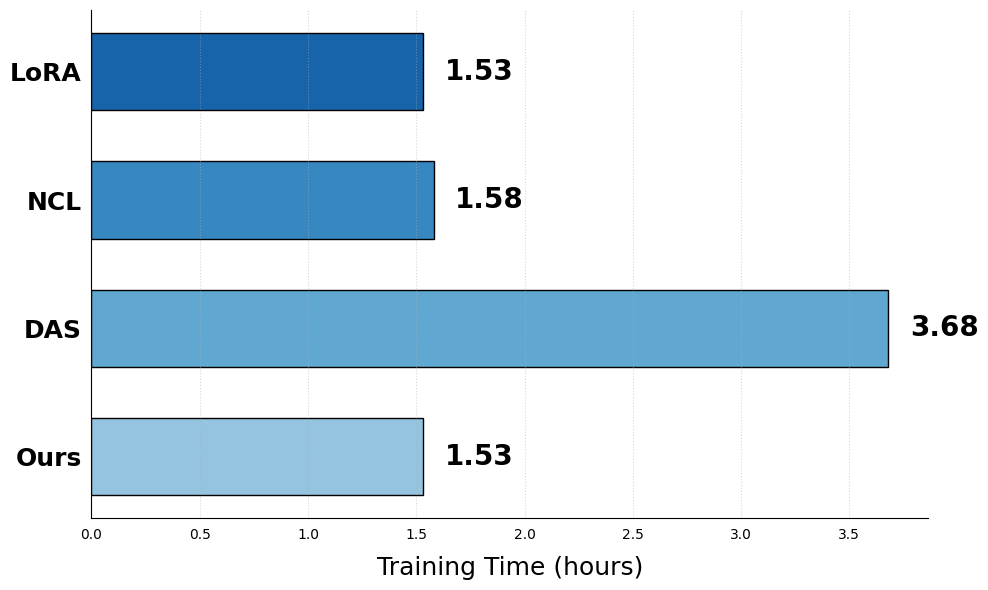

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
accuracy_results = {'LoRA': 1.53, 'NCL': 1.58, 'DAS': 3.68,  'Ours': 1.53}
methods, mean_accuracies = zip(*(accuracy_results.items()).__reversed__())

# Set up the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(methods)))

bars = plt.barh(methods, mean_accuracies, color=colors, edgecolor='black', height=0.6)

# Add data labels with larger font and bold style
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=20, fontweight='bold', color='black')

# Titles and labels with sans-serif font
# plt.title('Training Time for Different Methods', fontsize=18, fontweight='bold')
plt.xlabel('Training Time (hours)', fontsize=18, fontweight='regular', labelpad=10)
# plt.ylabel('Method', fontsize=14, fontweight='regular', labelpad=10)

# Style method names for emphasis
plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')

# Remove ticks and adjust spines
plt.tick_params(left=False, bottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Subtle gridlines
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

/tmp/ipykernel_15411/1087702842.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')


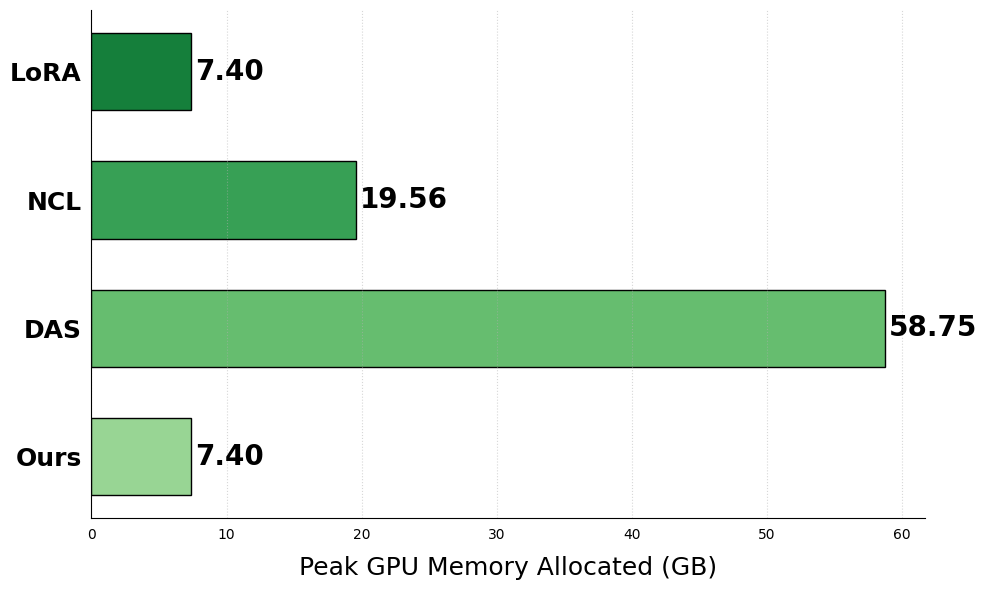

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
accuracy_results = {'LoRA': 7.4, 'NCL': 19.56, 'DAS': 58.75,  'Ours': 7.4}
methods, mean_accuracies = zip(*(accuracy_results.items()).__reversed__())

# Set up the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(methods)))

bars = plt.barh(methods, mean_accuracies, color=colors, edgecolor='black', height=0.6)

# Add data labels with larger font and bold style
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=20, fontweight='bold', color='black')

# Titles and labels with sans-serif font
# plt.title('Peak GPU Memory Allocated for Difference Methods', fontsize=18, fontweight='bold')
plt.xlabel('Peak GPU Memory Allocated (GB)', fontsize=18, fontweight='regular', labelpad=10)
# plt.ylabel('Method', fontsize=14, fontweight='regular', labelpad=10)

# Style method names for emphasis
plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')

# Remove ticks and adjust spines
plt.tick_params(left=False, bottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Subtle gridlines
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

/tmp/ipykernel_7506/3298818476.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')


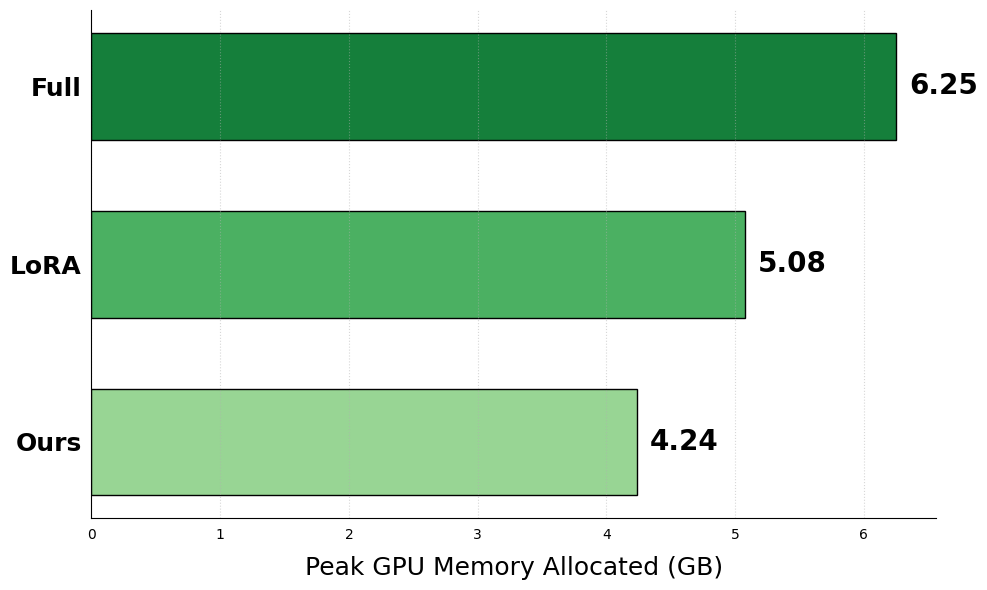

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
# accuracy_results = {'LoRA': 6.22, 'NCL': 6.70, 'DAS': 6.69,  'Ours': 4.23}
accuracy_results = {'Full': 6.25, 'LoRA': 5.08, 'Ours': 4.24}
methods, mean_accuracies = zip(*(accuracy_results.items()).__reversed__())

# Set up the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(methods)))

bars = plt.barh(methods, mean_accuracies, color=colors, edgecolor='black', height=0.6)

# Add data labels with larger font and bold style
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=20, fontweight='bold', color='black')

# Titles and labels with sans-serif font
# plt.title('Peak GPU Memory Allocated for Difference Methods', fontsize=18, fontweight='bold')
plt.xlabel('Peak GPU Memory Allocated (GB)', fontsize=18, fontweight='regular', labelpad=10)
# plt.ylabel('Method', fontsize=14, fontweight='regular', labelpad=10)

# Style method names for emphasis
plt.gca().set_yticklabels([f'{method}' for method in methods], fontsize=18, weight='bold')

# Remove ticks and adjust spines
plt.tick_params(left=False, bottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Subtle gridlines
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()